# Data distribution over the years

# Import Modules

In [1]:
import os
import string
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from utils import find_repurposed_compounds

tqdm.pandas()

# Add path constants

In [2]:
FIG_DIR = '../data/figures'
DATA_DIR = '../data'
os.makedirs(FIG_DIR, exist_ok=True)

# Load data file

In [3]:
surechembl_df = pd.read_parquet(f'{DATA_DIR}/surechembl_dump.pq')
surechembl_df.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description


In [4]:
# Extract year from publication date
surechembl_df['year'] = surechembl_df['PUBLICATION_DATE'].progress_apply(lambda x: x.split('-')[0])

100%|██████████| 133512452/133512452 [04:22<00:00, 508314.14it/s]


In [5]:
surechembl_df['SureChEMBL_ID'].nunique(), surechembl_df['PATENT_ID'].nunique()

(10718652, 1574602)

In [6]:
surechembl_df['SMILES'].nunique(), surechembl_df['InChIKey'].nunique()

(10718647, 10686744)

Since InchiKey is the most repliable compound representation, we choose that for finding overlaps between the datasets

# Filtering duplicate patent IDs

In [7]:
unique_patent_df = surechembl_df.drop_duplicates(subset=["PATENT_ID","year"], keep='first')
unique_patent_df.shape

(1574604, 7)

In [8]:
# Calculate unique patents per year
patent_count_df = pd.DataFrame(unique_patent_df['year'].value_counts()).reset_index()
patent_count_df.columns = ['year', 'patent_count']
patent_count_df.sort_values('year', ascending=True, inplace=True)
patent_count_df

,year,patent_count
6,2015,188598
4,2016,200056
3,2017,203123
2,2018,207456
5,2019,194261
1,2020,220631
0,2021,222474
7,2022,138005


In [9]:
patent_count_df['patent_count'].mean()

196825.5

1 million (1,96,825) patents are filed every year.

# Calculate unique compounds per year

In [10]:
# Get repreated smile counts
compound_count_df = find_repurposed_compounds(surechembl_df)
compound_count_df['unique_compounds'].mean()

1335843.0

In [11]:
compound_count_df['repuroposed_drug_count'].mean() / compound_count_df['unique_compounds'].sum()  # the total no.of unique compounds 

0.13065814292922148

13.07% compounds were found to be repurposed based on the patents

# Visualisation

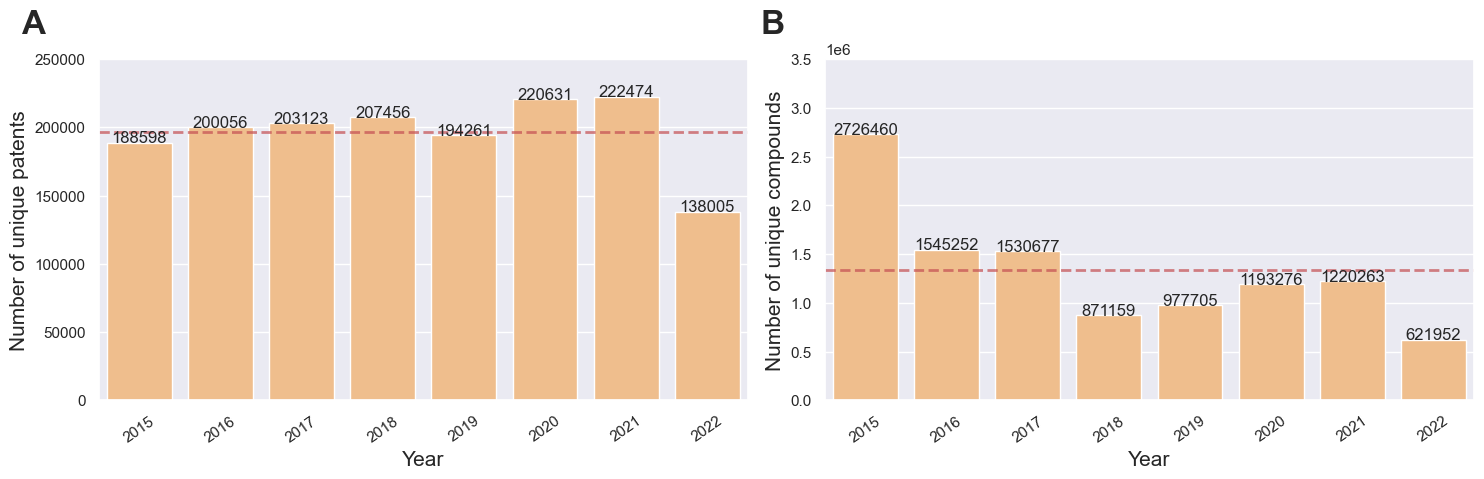

In [12]:
sns.set(rc={'figure.figsize':(15,5)})

patent_count_avg = patent_count_df['patent_count'].mean()

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=patent_count_df, x='year', y='patent_count', color='#ffbe7d')
ax1.axhline(patent_count_avg, linewidth=2, color='r', linestyle = '--', alpha=0.7)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of unique patents", fontsize=15)
plt.xticks(rotation=35)
plt.ylim(top = 250000)

# Show counts on top of plot
for p in ax1.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 50
    value = int(p.get_height())
    ax1.text(_x, _y, value, ha="center", fontsize=12)

plt.text(
    -0.1, 1.1, string.ascii_uppercase[0],
    size=24, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)

cpds_count_avg = compound_count_df['unique_compounds'].mean()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=compound_count_df, x='year', y='unique_compounds', color='#ffbe7d')
ax2.axhline(cpds_count_avg, linewidth=2, color='r', linestyle = '--', alpha=0.7)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of unique compounds", fontsize=15)
plt.xticks(rotation=35)
plt.ylim(top = 3500000)

for p in ax2.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 50
    value = int(p.get_height())
    ax2.text(_x, _y, value, ha="center", fontsize=12)

plt.text(
    -0.08, 1.1, string.ascii_uppercase[1],
    size=24, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)

plt.tight_layout()
plt.savefig(f'{FIG_DIR}/figure_1.png', dpi=400)
plt.show()

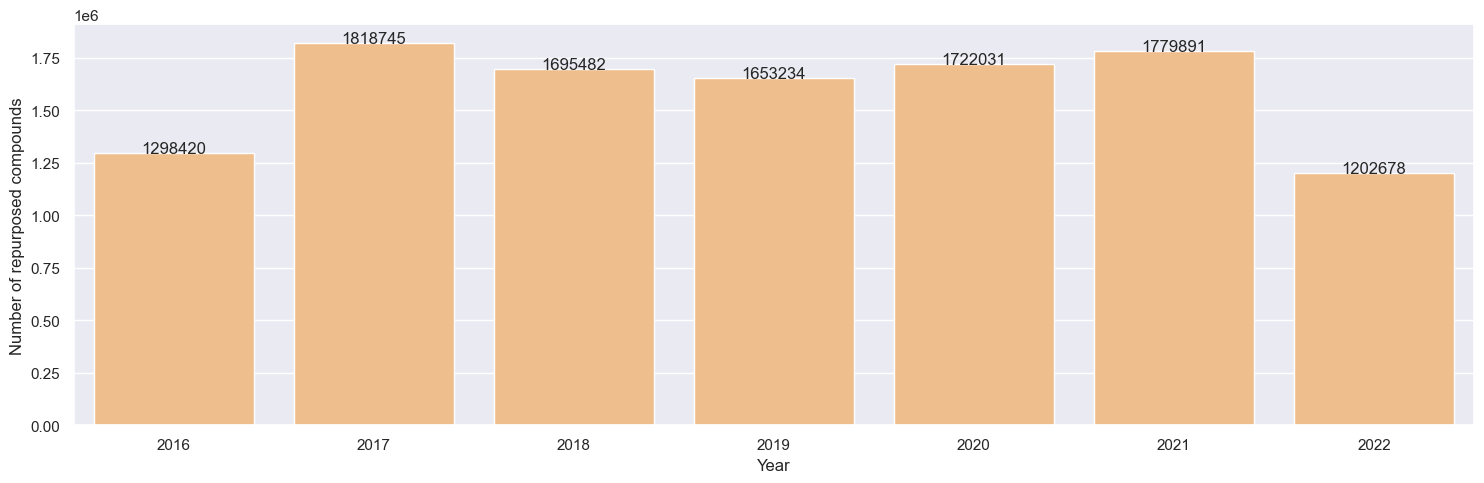

In [13]:
t = compound_count_df.iloc[1:]
ax = sns.barplot(data=t , x='year', y='repuroposed_drug_count', color='#ffbe7d')

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 50
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=12)

plt.xlabel("Year")
plt.ylabel("Number of repurposed compounds")
plt.tight_layout()
plt.savefig(f'{FIG_DIR}/supplementary_figure_1.png', dpi=400)
plt.show()